# HW 1

**1.Choose a long text (a novel), do preprocessing on it (delete punctuation, lemmatize it, make sure that every sentence starts on a new line), don't forget to put the lemmatized text or a link to your lemmatized text into your hw folder**

I have chosen "Roadside picnic"  by Arkadiy and Boris Strugackie. I have cut off the second part of the text, since lemmatization of the whole novel was problematic.

In [3]:
import re
import operator
from string import punctuation
from pymystem3 import Mystem
import re
import gensim
import logging
import nltk.data
import pandas as pd
import urllib.request
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from gensim.models import word2vec
from pymorphy2 import MorphAnalyzer

import warnings
warnings.filterwarnings('ignore')
import collections

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
m = Mystem()
morph = MorphAnalyzer()

In [3]:
def tokenize(s):
    words = ''
    p = list(punctuation)
    for i in range(len(s)):
        if s[i] in p:
            continue
        words = words + s[i]
    phrase = str(words)
    spltd = phrase.split()
    return spltd

In [4]:
with open('strugackie_preproc_1.txt') as f:
    text = f.read()

In [5]:
lines = text.splitlines() 

In the code below I augment a string containing a part of speech of the word analysed to the string representing lemma. This decision is driven by the need to сarry out agreement in task 5. A more detailed explanation of the techniques is given before the code for task 5.

In [ ]:
lines2= []
for l in lines:
    line = ' '.join(tokenize(l))
    lemmas = m.lemmatize(line)
    lemmas2 = []
    for l in lemmas:
        l_ana = morph.parse(l)[0]
        POS = str(l_ana.tag.POS)
        l_new = l+ '_' + POS
        if l_new == ' _None':
            pass
        else:
            lemmas2.append(l_new)
    line2 = ' '.join(lemmas2)
    lines2.append(line2)
tex2 = '\n'.join(lines2)

In [ ]:
my_file = open("strugackie2.txt", "w+")
my_file.write(tex2)
my_file.close()

**2.Train a word2vec model on the chosen text, set the parameters (window size, vector size, number of iterations etc.), comment on your choice of parameter settings and the reasoning behind it, experiment with the settings and show me that you have chosen the settings after some experimentation and consideration -- 2 points**

**3.Test your model, use most_similar, similarity, doesnt_match functions, comment on the model performance, explain the reasoning behind the testing -- 2 points**

In [4]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [5]:
f = 'strugackie2.txt'
data = gensim.models.word2vec.LineSentence(f)

First, let us implement the following paramaters:

In [9]:
model_strugackie1 = gensim.models.Word2Vec(data, vector_size=300, window=15, min_count=2)

2021-09-21 17:57:31,484 : INFO : collecting all words and their counts
2021-09-21 17:57:31,495 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2021-09-21 17:57:31,530 : INFO : collected 4182 word types from a corpus of 21762 raw words and 2531 sentences
2021-09-21 17:57:31,532 : INFO : Creating a fresh vocabulary
2021-09-21 17:57:31,556 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=2 retains 1891 unique words (45.21759923481588%% of original 4182, drops 2291)', 'datetime': '2021-09-21T17:57:31.556443', 'gensim': '4.1.0', 'python': '3.8.3 (default, Jul  2 2020, 17:30:36) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'prepare_vocab'}
2021-09-21 17:57:31,559 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=2 leaves 19471 word corpus (89.47247495634592%% of original 21762, drops 2291)', 'datetime': '2021-09-21T17:57:31.559754', 'gensim': '4.1.0', 'python': '3.8.3 (default, Jul  2 2020, 17:30:36) [MS

In [10]:
print(len(model_strugackie1.wv.key_to_index))

1891


To test my model, I formulated several hypotheses:
1. If a model is good enough, it should provide reasonable results for a query aiming at identifying words which describe Redrik (рэдрик_NOUN) as a person, but not as a stalker (сталкер_NOUN).
2. If a model is good enough, it should provide reasonable results for a query seeking words that can be representative of Redrik as a character in general.
3. If a model is good enough, it should predict vectors for рэрик_NOUN and гута_NOUN, as well as рэдрик_NOUN and кирилл_NOUN to show a higher similarity coefficient than vectors for гута_NOUN and кирилл_NOUN, sincee characters of Guta and Kirill do not occur in the same scene in the novel.
4. If a model is good enough, it should be able to identify мартышка_NOUN as an odd one out in the list of рэдрик_NOUN зона_NOUN барбридж_NOUN кирилл_NOUN, as the character of Martyshka does not visit Zona in the original story.
I will use functions `most_similar`, `similarity`, `doesnt_match` specified in the task, to check if the outlined above hyposes hold for each model.


Further on, I will only comment on the cases where a models seems not to provide a satisfactory result.

In [12]:
model_strugackie1.wv.most_similar(positive=["рэдрик_NOUN"], negative=["сталкер_NOUN"], topn=3, )

[('протез_NOUN', 0.08394461870193481),
 ('вырез_NOUN', 0.06946960836648941),
 ('верный_ADJF', 0.06739284098148346)]

In [13]:
model_strugackie1.wv.most_similar(positive=["рэдрик_NOUN"], topn=3)

[('и_CONJ', 0.9999586939811707),
 ('на_PREP', 0.9999536871910095),
 ('с_PREP', 0.9999494552612305)]

As can be seen from the result above, the present model fails to provide satisfactory list of terms describing Redrik as a character. The resulting terms are simply the most frequent ones in the model.

In [14]:
model_strugackie1.wv.similarity("рэдрик_NOUN", "гута_NOUN")

0.9998583

In [15]:
model_strugackie1.wv.similarity("рэдрик_NOUN", "кирилл_NOUN")

0.99983233

In [16]:
model_strugackie1.wv.similarity("кирилл_NOUN", "гута_NOUN")

0.9997754

The similarity coefficients are pretty similar for all the three pairs compaired. This can be either because the model is weak, or the original hypothesis is plain.

In [17]:
model_strugackie1.wv.doesnt_match("рэдрик_NOUN зона_NOUN барбридж_NOUN кирилл_NOUN мартышка_NOUN".split())

'мартышка_NOUN'

Let us increase the number of trainings.

In [18]:
model_strugackie2 = gensim.models.Word2Vec(data, vector_size=300, window=15, min_count=2, epochs = 3)

2021-09-21 17:58:05,627 : INFO : collecting all words and their counts
2021-09-21 17:58:05,630 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2021-09-21 17:58:05,677 : INFO : collected 4182 word types from a corpus of 21762 raw words and 2531 sentences
2021-09-21 17:58:05,679 : INFO : Creating a fresh vocabulary
2021-09-21 17:58:05,711 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=2 retains 1891 unique words (45.21759923481588%% of original 4182, drops 2291)', 'datetime': '2021-09-21T17:58:05.711203', 'gensim': '4.1.0', 'python': '3.8.3 (default, Jul  2 2020, 17:30:36) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'prepare_vocab'}
2021-09-21 17:58:05,713 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=2 leaves 19471 word corpus (89.47247495634592%% of original 21762, drops 2291)', 'datetime': '2021-09-21T17:58:05.712203', 'gensim': '4.1.0', 'python': '3.8.3 (default, Jul  2 2020, 17:30:36) [MS

In [19]:
print(len(model_strugackie2.wv.key_to_index))

1891


In [20]:
model_strugackie2.wv.most_similar(positive=["рэдрик_NOUN"], negative=["сталкер_NOUN"], topn=3)

[('востроносый_ADJF', 0.12317244708538055),
 ('выдерживать_INFN', 0.1169157326221466),
 ('досада_NOUN', 0.11178231984376907)]

In [21]:
model_strugackie2.wv.most_similar(positive=["рэдрик_NOUN"], topn=3)

[('и_CONJ', 0.999818742275238),
 ('на_PREP', 0.9998012185096741),
 ('в_PREP', 0.9997910857200623)]

As can be seen from the result, increasing the number of trainings 3 times on it's own does not solve the problem of the most frequent tokens. It worth mentioning that introducing a "stopwords" module would help, however since I have all tokens in my model with an augmented "part of speech" string, this will not help.

In [22]:
model_strugackie2.wv.similarity("рэдрик_NOUN", "гута_NOUN")

0.99926007

In [23]:
model_strugackie2.wv.similarity("рэдрик_NOUN", "кирилл_NOUN")

0.9994021

In [24]:
model_strugackie2.wv.similarity("кирилл_NOUN", "гута_NOUN")

0.99905694

In [25]:
model_strugackie2.wv.doesnt_match("рэдрик_NOUN зона_NOUN барбридж_NOUN кирилл_NOUN мартышка_NOUN".split())

'мартышка_NOUN'

Overall, the second model was not better than the previous one.

In the third model, I will preserve all the paramaters as they were specified above, but the query window will be reduced to 5 to tackle the "most frequent words" problem.

In [111]:
model_strugackie3 = gensim.models.Word2Vec(data, vector_size=300, window=5, min_count=2, epochs = 3)

2021-09-24 10:59:31,877 : INFO : collecting all words and their counts
2021-09-24 10:59:31,922 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2021-09-24 10:59:31,962 : INFO : collected 4182 word types from a corpus of 21762 raw words and 2531 sentences
2021-09-24 10:59:31,962 : INFO : Creating a fresh vocabulary
2021-09-24 10:59:31,993 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=2 retains 1891 unique words (45.21759923481588%% of original 4182, drops 2291)', 'datetime': '2021-09-24T10:59:31.984013', 'gensim': '4.1.0', 'python': '3.8.3 (default, Jul  2 2020, 17:30:36) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'prepare_vocab'}
2021-09-24 10:59:31,994 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=2 leaves 19471 word corpus (89.47247495634592%% of original 21762, drops 2291)', 'datetime': '2021-09-24T10:59:31.994354', 'gensim': '4.1.0', 'python': '3.8.3 (default, Jul  2 2020, 17:30:36) [MS

In [27]:
print(len(model_strugackie3.wv.key_to_index))

1891


In [28]:
model_strugackie3.wv.most_similar(positive=["рэдрик_NOUN"], negative=["сталкер_NOUN"], topn=3)

[('досада_NOUN', 0.19106616079807281),
 ('востроносый_ADJF', 0.1660316288471222),
 ('бугор_NOUN', 0.16057683527469635)]

In [29]:
model_strugackie3.wv.most_similar(positive=["рэдрик_NOUN"], topn=3)

[('и_CONJ', 0.9983274340629578),
 ('на_PREP', 0.9982181191444397),
 ('он_NPRO', 0.997957170009613)]

As can be seen from the result obtained, reducing the window size only did not help.

In [30]:
model_strugackie3.wv.similarity("рэдрик_NOUN", "гута_NOUN")

0.99207306

In [31]:
model_strugackie3.wv.similarity("рэдрик_NOUN", "кирилл_NOUN")

0.9950063

In [33]:
model_strugackie3.wv.similarity("кирилл_NOUN", "гута_NOUN")

0.9907466

In [35]:
model_strugackie3.wv.doesnt_match("рэдрик_NOUN зона_NOUN барбридж_NOUN кирилл_NOUN мартышка_NOUN".split())

'мартышка_NOUN'

Let us now consider a model that uses the skip-gram algorithm (all the other paramentes are keeped as they were specified above).

In [36]:
model_strugackie4 = gensim.models.Word2Vec(data, vector_size=300, window=5, min_count=2, sg= 1, epochs = 3)

2021-09-21 17:59:25,831 : INFO : collecting all words and their counts
2021-09-21 17:59:25,834 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2021-09-21 17:59:25,873 : INFO : collected 4182 word types from a corpus of 21762 raw words and 2531 sentences
2021-09-21 17:59:25,877 : INFO : Creating a fresh vocabulary
2021-09-21 17:59:25,897 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=2 retains 1891 unique words (45.21759923481588%% of original 4182, drops 2291)', 'datetime': '2021-09-21T17:59:25.897292', 'gensim': '4.1.0', 'python': '3.8.3 (default, Jul  2 2020, 17:30:36) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'prepare_vocab'}
2021-09-21 17:59:25,898 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=2 leaves 19471 word corpus (89.47247495634592%% of original 21762, drops 2291)', 'datetime': '2021-09-21T17:59:25.898292', 'gensim': '4.1.0', 'python': '3.8.3 (default, Jul  2 2020, 17:30:36) [MS

In [37]:
print(len(model_strugackie4.wv.key_to_index))

1891


In [38]:
model_strugackie4.wv.most_similar(positive=["рэдрик_NOUN"], negative=["сталкер_NOUN"], topn=3)

[('отель_NOUN', 0.09701748192310333),
 ('вне_PREP', 0.05859766900539398),
 ('верный_ADJF', 0.058121826499700546)]

In [39]:
model_strugackie4.wv.most_similar(positive=["рэдрик_NOUN"], topn=3)

[('два_NUMR', 0.9995715022087097),
 ('с_PREP', 0.9995636940002441),
 ('барбридж_NOUN', 0.9995586276054382)]

Surprisingly, skip-gram model shows a better performind in the similarity test that the "bag of words" model.

In [40]:
model_strugackie4.wv.similarity("рэдрик_NOUN", "гута_NOUN")

0.99937505

In [41]:
model_strugackie4.wv.similarity("рэдрик_NOUN", "кирилл_NOUN")

0.99934775

In [42]:
model_strugackie4.wv.similarity("кирилл_NOUN", "гута_NOUN")

0.9993142

However, none of the models studied so far gave a predicted result in the test above.

In [43]:
model_strugackie4.wv.doesnt_match("рэдрик_NOUN зона_NOUN барбридж_NOUN кирилл_NOUN мартышка_NOUN".split())

'мартышка_NOUN'

Let us go back to the "bag of words" model and increase the number of epochs of training.

In [44]:
model_strugackie5 = gensim.models.Word2Vec(data, vector_size=300, window=5, min_count=2, epochs = 15)

2021-09-21 17:59:48,994 : INFO : collecting all words and their counts
2021-09-21 17:59:48,997 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2021-09-21 17:59:49,037 : INFO : collected 4182 word types from a corpus of 21762 raw words and 2531 sentences
2021-09-21 17:59:49,039 : INFO : Creating a fresh vocabulary
2021-09-21 17:59:49,061 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=2 retains 1891 unique words (45.21759923481588%% of original 4182, drops 2291)', 'datetime': '2021-09-21T17:59:49.061902', 'gensim': '4.1.0', 'python': '3.8.3 (default, Jul  2 2020, 17:30:36) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'prepare_vocab'}
2021-09-21 17:59:49,062 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=2 leaves 19471 word corpus (89.47247495634592%% of original 21762, drops 2291)', 'datetime': '2021-09-21T17:59:49.062897', 'gensim': '4.1.0', 'python': '3.8.3 (default, Jul  2 2020, 17:30:36) [MS

In [45]:
print(len(model_strugackie5.wv.key_to_index))

1891


In [46]:
model_strugackie5.wv.most_similar(positive=["рэдрик_NOUN"], negative=["сталкер_NOUN"], topn=3)

[('протез_NOUN', 0.0407133586704731),
 ('новость_NOUN', 0.030972125008702278),
 ('врать_INFN', 0.029972020536661148)]

In [47]:
model_strugackie5.wv.most_similar(positive=["рэдрик_NOUN"], topn=3)

[('барбридж_NOUN', 0.9998448491096497),
 ('хрипатый_ADJF', 0.9998412132263184),
 ('снова_ADVB', 0.9997943043708801)]

Fortunatelly, the result of this model is better on this test than of any tried so far.

In [48]:
model_strugackie5.wv.similarity("рэдрик_NOUN", "гута_NOUN")

0.99977547

In [49]:
model_strugackie5.wv.similarity("рэдрик_NOUN", "кирилл_NOUN")

0.99955827

In [50]:
model_strugackie5.wv.similarity("кирилл_NOUN", "гута_NOUN")

0.9996924

Still, it cannot find the expected distinction.

Since both Dina and Martyshka have not visited Zona on their own, but Martyshka is definitelly more connected to it, it is interesting to check which of this terms would stand out on the test.

In [51]:
model_strugackie5.wv.doesnt_match("рэдрик_NOUN зона_NOUN барбридж_NOUN кирилл_NOUN мартышка_NOUN дина_NOUN".split())

'дина_NOUN'

In [52]:
model_strugackie5.wv.doesnt_match("рэдрик_NOUN зона_NOUN барбридж_NOUN кирилл_NOUN мартышка_NOUN".split())

'мартышка_NOUN'

Let us introduce a number of fake words and increase the number of trainings.

In [6]:
model_strugackie6 = gensim.models.Word2Vec(data, vector_size=300, window=5, epochs = 35, negative = 20, ns_exponent = 0.75, min_count=1)

2021-09-22 09:09:36,849 : INFO : collecting all words and their counts
2021-09-22 09:09:36,885 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2021-09-22 09:09:36,901 : INFO : collected 4182 word types from a corpus of 21762 raw words and 2531 sentences
2021-09-22 09:09:36,901 : INFO : Creating a fresh vocabulary
2021-09-22 09:09:36,918 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 4182 unique words (100.0%% of original 4182, drops 0)', 'datetime': '2021-09-22T09:09:36.918030', 'gensim': '4.1.0', 'python': '3.8.3 (default, Jul  2 2020, 17:30:36) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'prepare_vocab'}
2021-09-22 09:09:36,918 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 21762 word corpus (100.0%% of original 21762, drops 0)', 'datetime': '2021-09-22T09:09:36.918030', 'gensim': '4.1.0', 'python': '3.8.3 (default, Jul  2 2020, 17:30:36) [MSC v.1916 64 bit (AMD64)]', 'pl

In [8]:
print(len(model_strugackie6.wv.key_to_index))

4182


In [ ]:
print(list(model_strugackie6.wv.key_to_index.keys()))

In [10]:
model_strugackie6.wv.most_similar(positive=["рэдрик_NOUN"], negative=["сталкер_NOUN"], topn=3)

[('ряшка_NOUN', 0.6155922412872314),
 ('барбридж_NOUN', 0.5065398216247559),
 ('рука_NOUN', 0.41529443860054016)]

In [11]:
model_strugackie6.wv.most_similar(positive=["рэдрик_NOUN"], topn=3)

[('барбридж_NOUN', 0.9445749521255493),
 ('хрипатый_ADJF', 0.9275789856910706),
 ('снова_ADVB', 0.8969085812568665)]

In [12]:
model_strugackie6.wv.similarity("рэдрик_NOUN", "гута_NOUN")

0.75653267

In [14]:
model_strugackie6.wv.similarity("рэдрик_NOUN", "кирилл_NOUN")

0.4559571

In [15]:
model_strugackie6.wv.similarity("кирилл_NOUN", "гута_NOUN")

0.8581152

The obtained model performs better than anyone tried before on each test. It also shows a difference in similarity coefficients for vectors рэдрик_NOUN, гута_NOUN and кирилл_NOUN. However, this difference is not expected. Probably, the initial hypothesis is flawed.

In [16]:
model_strugackie6.wv.doesnt_match("рэдрик_NOUN зона_NOUN барбридж_NOUN кирилл_NOUN мартышка_NOUN дина_NOUN".split())

'зона_NOUN'

This result is even more logical that in the previous model, because in this case the model identifies an inanimate object as an odd one out among the animate entities.

**4. Visualize the results of the training and testing (one plot or one graph), comment on the visualization -- 1 point**

To check if the final model is adequate, let us build a visualisation showing clusters of characters. The hypothesis behind this experiment is that vectors for Redrik, Guta, Martyshka, Kirill, Barbridzh, Artur and Dina will cluster in a way that will be consistent with the relationships bwtween those characters in the model.

In [115]:
words = ['рэдрик_NOUN', 'кирилл_NOUN', 'гута_NOUN','мартышка_NOUN', 'барбридж_NOUN', 'дина_NOUN', 'артур_NOUN']
X = model_strugackie6.wv[words]

In [116]:
pca = PCA(n_components=2)
coords = pca.fit_transform(X)

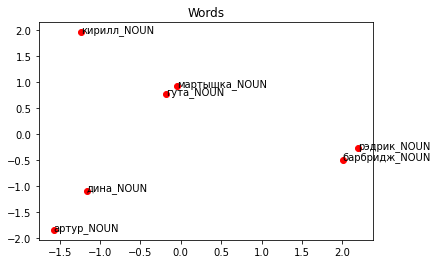

In [117]:
plt.scatter(coords[:, 0], coords[:, 1], color='red')
plt.title('Words')

for i, word in enumerate(words):
    plt.annotate(word, xy=(coords[i, 0], coords[i, 1]))
plt.show()

The obtained visualisation is exceptionally successfull. As can be seen from the picture above, we have three clustrs each containing two terms. The central cluster brings together Matryshka and Guta, which is only reasonable, since they form a family in the novel. The right most cluster includes Redrik and Barbrigzh. This probably reflects the facts that both characters are stalkers and friends, and have visited Zona together many times. The third cluster comprises Dina and Artur who are siblings in the model. The fact that Kirill does not cluster with anyone clearly shows that his character is alienete to the world described.

**5. Choose two sentences from the original text and substitute all the meaningful words with their closest neighbours from your word2vec model (1 point), do the agreement on the sentences with substitutions (1 point)**

I had some problems understanding this task. It seemed a bit dull to me to specify inflection features of  words in a new sentence manually (at least I did not understand how it can be done automatically, since there is no place from where the code can take a set of agreement features for a semantically odd new sentence). So I decide for each new word obtained to specify a set of features available for the word it was taken instead of. For this I had to control for a new word to be of the same part of speech as the replaced word (this is why I had to preserve these features in the model). Moreover, I had to control for the features of the new and the old word not to clash. This is what expected, for example, if an obtained new noun is animate, while an old nominal term was inanimate. The feature of inanimacy can not be implemented on an animate noun in any case. The code below deliberately refuses to deal with a number of problems that arose during the work. First, it only seeks for the top five neighbors of the original term and then checks if any o them is of the same part of speech as the original token. If none of the found neighbors is of the same part of speech as the original word, the original term is kept. Otherwise, it would cost me a number of additional dull iterations of the same lines of code. Second, if the morphological analyser was not able to specify the inflection features of the original token correctly, the flawed set of features was transmitted to the new term without any correction. This is the case with the word "пришелецы_NOUN". As can be seen from the results, for this word the morphological analyser failed to specify the plurality feature. For this reason, the agreement in the second sentence is incorrect. Since I'm not aware of any technique to verify agreemnt automatically, I decided not to do it manually. 

In [7]:
sentences = 'Сам факт Посещения является наиболее важным открытием не только за истекшие тринадцать лет но и за все время существования человечества. Не так уж важно кто были эти пришельцы'

In [8]:
lines = sentences.split('.') 

In [9]:
print(lines)

['Сам факт Посещения является наиболее важным открытием не только за истекшие тринадцать лет но и за все время существования человечества', ' Не так уж важно кто были эти пришельцы']


In [ ]:
The results of the implementation of the code below are fully preserved to allow you to 

In [119]:
new_sents = []
stops = ['PREP', 'CONJ', 'PRCL', 'INTJ', 'ADVB']
for l in lines:
    new_bag = []
    words = l.split()
    for w in words:
        print(w)
        ana = morph.parse(w)[0].tag
        feats = str(ana).split(',')
        if len(feats[0]) > 4:
            feats[0] = feats[0].split(' ')[0]
        feats2 = feats[1:]
        feats3 = []
        for f in feats2:
            if len(f) > 4:
                continue
            if f == "anim" or f == "inan":
                continue
            else:
                feats3.append(f)
        print(feats3)
        if feats[0] in stops:
            x  = w
        else:
            lemma = m.lemmatize(w)[0]
            lemma_1 = lemma + '_' + str(feats[0])
            print(lemma_1)
            if lemma_1 in list(model_strugackie6.wv.key_to_index.keys()):
                    substitutes = model_strugackie6.wv.most_similar(positive=[lemma_1], topn=5)
                    print(substitutes)
                    substitute = substitutes[0]
                    new_lemma = substitute[0] 
                    print(new_lemma)
                    POS_new_lemma = new_lemma.split('_')[1]
                    print(POS_new_lemma)
                    if POS_new_lemma == str(feats[0]):
                        act_substitute = new_lemma
                    else:
                        substitute1 =  substitutes[1]
                        print(substitute1)
                        new_lemma1 = substitute1[0]
                        print(new_lemma1)
                        POS_new_lemma1 = new_lemma1.split('_')[1]
                        print(POS_new_lemma1)
                        if POS_new_lemma1 == str(feats[0]):
                            act_substitute = new_lemma1
                        else:
                            substitute2 = substitutes[2]
                            print(substitute2)
                            new_lemma2 = substitute2[0]
                            POS_new_lemma2 = new_lemma2.split('_')[1]
                            if POS_new_lemma2 == str(feats[0]):
                                act_substitute = new_lemma2 
                            else:
                                substitute3 = substitutes[3]
                                print(substitute3)
                                new_lemma3 = substitute3[0]
                                POS_new_lemma3 = new_lemma3.split('_')[1]
                                if POS_new_lemma3 == str(feats[0]):
                                    act_substitute = new_lemma3
                                else:
                                    substitute4 = substitutes[4]
                                    print(substitute4)
                                    new_lemma4 = substitute4[0]
                                    POS_new_lemma4 = new_lemma4.split('_')[1]
                                    if POS_new_lemma3 == str(feats[0]):
                                        act_substitute = new_lemma4 
                                    else:
                                        act_substitute = lemma
            else:
                act_substitute = lemma_1
            print(act_substitute, "HuRAAAAAA")
            i = 0
            x =  act_substitute.split('_')[0]
            print(feats3)
            while i < len(feats3):
                an = morph.parse(x)[0]
                fea = str(feats3[i])
                new_form = an.inflect({fea}).word
                x = new_form
                i = i + 1
            print(x, "HURAAAAAAAAA")
        print("THe enad")
        new_bag.append(x)
    new_sent = ' '.join(new_bag)
    print(new_sent)
    new_sents.append(new_sent)

Сам
['sing', 'nomn']
сам_ADJF
[('бредить_INFN', 0.9499155282974243), ('я_NPRO', 0.9416914582252502), ('даже_PRCL', 0.9415504932403564), ('сердито_ADVB', 0.9402171969413757), ('а_CONJ', 0.9317688345909119)]
бредить_INFN
INFN
('я_NPRO', 0.9416914582252502)
я_NPRO
NPRO
('даже_PRCL', 0.9415504932403564)
('сердито_ADVB', 0.9402171969413757)
('а_CONJ', 0.9317688345909119)
сам HuRAAAAAA
['sing', 'nomn']
сам HURAAAAAAAAA
THe enad
факт
['nomn']
факт_NOUN
[('собираться_INFN', 0.9989069104194641), ('наиболее_ADVB', 0.9987283945083618), ('мама_NOUN', 0.9985398054122925), ('закладывать_INFN', 0.9985182881355286), ('распоряжаться_INFN', 0.9985096454620361)]
собираться_INFN
INFN
('наиболее_ADVB', 0.9987283945083618)
наиболее_ADVB
ADVB
('мама_NOUN', 0.9985398054122925)
мама_NOUN HuRAAAAAA
['nomn']
мама HURAAAAAAAAA
THe enad
Посещения
['gent']
посещение_NOUN
[('город_NOUN', 0.9908337593078613), ('молоко_NOUN', 0.9907938838005066), ('закапывать_INFN', 0.9893375039100647), ('жучковпаучок_NOUN', 0.9886732

In [120]:
print(new_sents)

['сам мама города является наиболее уверенным открытием не только за истекший тринадцать часа но и за все сторону сторонки человечества', 'Не так уж важно кто были каждый кость']
